## Important packages

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset,DataLoader, random_split
import numpy as np
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import matplotlib.pyplot as plt
import torch.optim as optim

In [ ]:
class WineDataset(Dataset):

    def __init__(self):
        xy = np.loadtxt("wine1.csv",delimiter = ',',
                       dtype=np.float32,skiprows=1)
        self.n_samples =xy.shape[0] #data points
        #n_samples(all rows) and n_features (all columns except first coloumn, which is our target)
        self.x_data=torch.from_numpy(xy[:,1:]) # [n_samples,n_features]
        self.y_data=torch.from_numpy(xy[:,[0]]) # [n_samples,1]

    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]

    def __len__(self):
        return self.n_samples #dataset-i lengthy data points-nern en voch te featurner-i qanaky
        #qani vor mi data pointy bolor featurneri hamaxumbna

## Dataset

In [ ]:
dataset = WineDataset()

In [ ]:
#get first data point and unpack
first_data = dataset[0] #0rd tox
features,labels = first_data
print(features,labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([0.])


### Use wine dataset and create separate train and test data loaders

In [ ]:
train_size = int(0.8 * len(dataset))  # 80% of the dataset for training
test_size = len(dataset) - train_size  # 20% for testing
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=0)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=4,
                         shuffle=False,
                         num_workers=0)

##  Model training

### Define a neural network model class (two hidden layers)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, 70)
        self.fc2 = nn.Linear(70, 50)
        self.out = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

### Getting to know DataLoader better

In [ ]:
data_iter = iter(train_loader)
data, labels = next(data_iter)

print("Data shape:", data.shape)
print("Data type:", data.dtype)
print("Labels shape:", labels.shape)
print("Labels type:", labels.dtype)
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Sample data:\n", data[0])
print("Sample label:\n", labels[0])

Data shape: torch.Size([4, 13])
Data type: torch.float32
Labels shape: torch.Size([4, 1])
Labels type: torch.float32
-----------------------------------------------------------------------------------------------------------------------------
Sample data:
 tensor([ 12.7700,   2.3900,   2.2800,  19.5000,  86.0000,   1.3900,   0.5100,
          0.4800,   0.6400,   9.9000,   0.5700,   1.6300, 470.0000])
Sample label:
 tensor([2.])


### Print out the loss during training (for each epoch and final loss)

In [ ]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()

In [ ]:
num_epochs = 5
batch_size = 4

In [ ]:
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / batch_size)

final_losses = []

for epoch in range(num_epochs):
    total_loss = 0.0
    num_batches = 0

    for i, (inputs, labels) in enumerate(train_loader):
        labels = labels.squeeze().long()

        optimizer.zero_grad()

        # Forward pass
        output = model(inputs)

        # Compute the loss
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        num_batches += 1


        if (i + 1) % 5 == 0:
            print(f"Epoch: {epoch + 1}/{num_epochs}, "
                  f"Step: {i + 1}/{n_iterations}, "
                  f"| Inputs {inputs.shape} | Labels {labels.shape}")

    avg_loss = total_loss / num_batches
    final_losses.append(avg_loss)
    print(f'\033[1;30;46mEpoch {epoch + 1}/{num_epochs}: Average Loss = {avg_loss:.4f}\033[0m')
final_loss = final_losses[-1]
print(f'\033[1;30;44mFinal Loss after all epochs: {final_loss:.4f}\033[0m')

Epoch: 1/5, Step: 5/45, | Inputs torch.Size([4, 13]) | Labels torch.Size([4])
Epoch: 1/5, Step: 10/45, | Inputs torch.Size([4, 13]) | Labels torch.Size([4])
Epoch: 1/5, Step: 15/45, | Inputs torch.Size([4, 13]) | Labels torch.Size([4])
Epoch: 1/5, Step: 20/45, | Inputs torch.Size([4, 13]) | Labels torch.Size([4])
Epoch: 1/5, Step: 25/45, | Inputs torch.Size([4, 13]) | Labels torch.Size([4])
Epoch: 1/5, Step: 30/45, | Inputs torch.Size([4, 13]) | Labels torch.Size([4])
Epoch: 1/5, Step: 35/45, | Inputs torch.Size([4, 13]) | Labels torch.Size([4])
Epoch 1/5: Average Loss = 0.8025
Epoch: 2/5, Step: 5/45, | Inputs torch.Size([4, 13]) | Labels torch.Size([4])
Epoch: 2/5, Step: 10/45, | Inputs torch.Size([4, 13]) | Labels torch.Size([4])
Epoch: 2/5, Step: 15/45, | Inputs torch.Size([4, 13]) | Labels torch.Size([4])
Epoch: 2/5, Step: 20/45, | Inputs torch.Size([4, 13]) | Labels torch.Size([4])
Epoch: 2/5, Step: 25/45, | Inputs torch.Size([4, 13]) | Labels torch.Size([4])
Epoch: 2/5, Step: 30/

## Model Evaluation

In [ ]:
model.eval()

total = 0
correct = 0
for inputs, labels in test_loader:
        labels = labels.squeeze().long()

        # forward pass
        outputs = model(inputs)

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)

        # Total correct predictions
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'The testing set accuracy of the network is: {accuracy:.2f}%')

The testing set accuracy of the network is: 66.67%


## Hyperparameter tuning

### Train the model with different optimizers, epochs and learning rate( overall 3 experiments)

<span style="color:purple">Experiment 1</span><br>
<span style="color:purple">Optimizer:</span> <span style="color:purple">Adam</span> with a learning rate of <span style="color:purple">0.001</span><br>
<span style="color:purple">Epochs:</span> <span style="color:purple">5</span>


In [ ]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

losses = []
for epoch in range(5):
    total_loss = 0
    for inputs, labels in train_loader:
        labels = labels.squeeze().long()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}/5, Average Loss: {avg_loss:.4f}')

Epoch 1/5, Average Loss: 2.8432
Epoch 2/5, Average Loss: 1.3195
Epoch 3/5, Average Loss: 0.8202
Epoch 4/5, Average Loss: 1.0782
Epoch 5/5, Average Loss: 0.8512


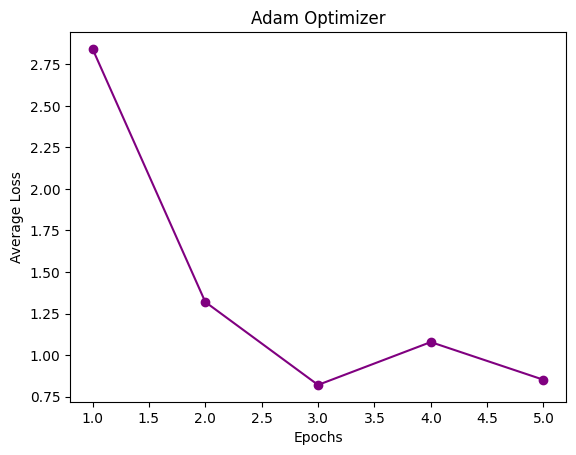

In [ ]:
plt.plot(range(1, 6), losses, marker='o',color='purple')
plt.title('Adam Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.show()

<span style="color:purple">Experiment 2</span><br>
<span style="color:purple">Optimizer:</span> <span style="color:purple">SGD (Stochastic Gradient Descent)</span> with a learning rate of <span style="color:purple">0.01</span><br>
<span style="color:purple">Epochs:</span> <span style="color:purple">10</span>

In [ ]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

losses = []
for epoch in range(10):
    total_loss = 0
    for inputs, labels in train_loader:
        labels = labels.squeeze().long()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}/10, Average Loss: {avg_loss:.4f}')

Epoch 1/10, Average Loss: 12.1998
Epoch 2/10, Average Loss: 1.0947
Epoch 3/10, Average Loss: 1.0894
Epoch 4/10, Average Loss: 1.0879
Epoch 5/10, Average Loss: 1.0868
Epoch 6/10, Average Loss: 1.0841
Epoch 7/10, Average Loss: 1.0836
Epoch 8/10, Average Loss: 1.0876
Epoch 9/10, Average Loss: 1.0875
Epoch 10/10, Average Loss: 1.0832


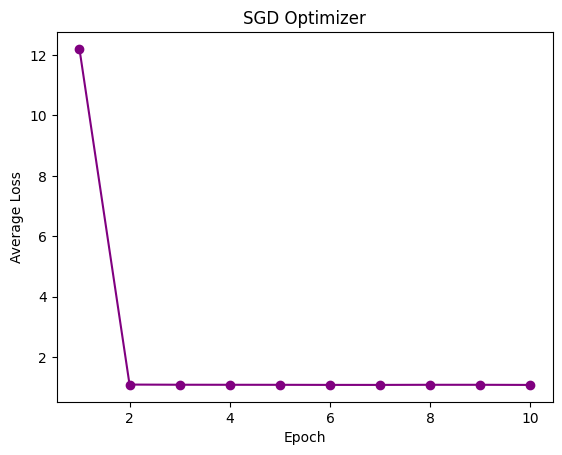

In [ ]:
plt.plot(range(1, 11), losses, marker='o', label='SGD',color='purple')
plt.title('SGD Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.show()

<span style="color:purple">Experiment 3</span><br>
<span style="color:purple">Optimizer:</span> <span style="color:purple">RMSprop</span> with a learning rate of <span style="color:purple">0.0001</span><br>
<span style="color:purple">Epochs:</span> <span style="color:purple">8</span>

In [ ]:
model = Net()
optimizer = optim.RMSprop(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

losses = []
for epoch in range(8):
    total_loss = 0
    for inputs, labels in train_loader:
        labels = labels.squeeze().long()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}/8, Average Loss: {avg_loss:.4f}')

Epoch 1/8, Average Loss: 6.4267
Epoch 2/8, Average Loss: 0.9310
Epoch 3/8, Average Loss: 0.8271
Epoch 4/8, Average Loss: 0.8330
Epoch 5/8, Average Loss: 0.7882
Epoch 6/8, Average Loss: 0.7878
Epoch 7/8, Average Loss: 0.7727
Epoch 8/8, Average Loss: 0.7825


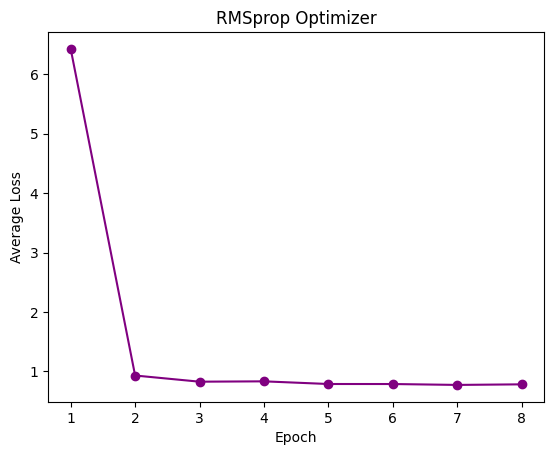

In [ ]:
plt.plot(range(1, 9), losses, marker='o', label='RMSprop',color='purple')
plt.title('RMSprop Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.show()